# Chapter 10 : 서포트 벡터 머신 모델
## 1. 서포트 벡터 머신 모델이란?
**서포트 벡터 머신(support vector machine, SVM)**
- 분류 문제와 회귀 문제 모두에 적용할 수 있는 지도 학습 모델
- 선형 분류기(linear classifier) : 2개의 레이블과 p차원의 피처 데이터가 있을 때 데이터를 클래스 레이블에 맞게 분할하는 적절한 (p-1)차원 초평면(hyperplane)
- 적절한 초평면 : 영역 경계에서 가장 가까운 점들을 등분하는 초평면
- SVM : 각각의 클래스의 가장 경계에 있는 데이터 포인트의 경계 영역을 등분하는 직선을 찾는 것
- 마진(margin) : 결정 경계에서 점까지의 최소 거리
- 마진을 최대화하는 직선을 찾는 것
- 최대 마진 초평면(maximum margin hyperplane) : 마진을 최대화하는 초평면
- 최대 마진 분류기(maximum margin classifier) : 최대 마진 초평면에서 정의되는 선형 분류기  
<br><br>
- 좋은 경계선을 찾는 모델
- 두 클래스 레이블이 분포된 영역을 최대한 잘 분리하는 결정 경계(dicision boundary)를 찾는 것이 목표
- 학습한 SVM은 선형 분류기로 동작
- 커널 트릭(kernel trick)을 사용하면 SVM은 비선형 분류기(non-linear classifier)로 동작 가능
    - 커널 트릭 : 입력 공간에 적절한 함수 변환을 수행해 입력 공간을 고차원의 피처 공간으로 변환한 후 그곳에서 선형 결정 경계를 찾아내는 방법

## 2. 서포트 벡터 머신 모델 구현하기
### 서포트 벡터 머신 모델의 이론
- 분할 초평면을 찾는 것이 목표
- 좋은 분할 : 초평면에서 각 클래스의 가장 가까운 데이터 포인트까지의 거리가 최대인 상황  
$\rightarrow$ 초평면과 각각의 클래스와의 마진이 최대화된다고 표현
- 마진이 클수록 분류기의 일반화 오차(generalization error)가 작아질 것으로 예상 가능
- 원래의 공간에서는 분할해야 할 집합을 선형으로 분할할 수 없을 때(linearly non-separable)가 흔함  
$\rightarrow$원래의 공간을 고차원으로 매핑(mapping)하여 고차원 공간에서 쉽게 분할하는 방법을 시도 (커널 트릭)

#### 선형 SVM
- 학습 데이터셋이 $p$차원 벡터인 피처 $x_i$, 클래스 레이블 $y_i \in {-1, 1}$
- $n$개의 샘플 $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$이 있다고 가정
- $y_i = 1$일 때의 데이터 샘플과 $y_i = -1$인 데이터 샘플을 분할하는 초평면 중 마진을 최대화하는 것을 찾는 것이 목표
- 학습 데이터를 선형으로 분할 가능(linearly separable) $\rightarrow$ 두 개의 평행한 초평면을 그어 두 데이터셋을 구분
- 마진 : 평행한 두 초평면 사이의 영역
- 언제나 평행한 두 초평면을 조정하여 마진을 최대화할 수 있음
- 최대 마진 초평면 : 두 초평면을 절반으로 나누는 초평면\
- 최대 마진 초평면을 찾는 것이 목표  
<br><br>
- 최대 마진 초평면  
$w^Tx + b = 0$
    - 법선 벡터(normal vector) $w$, 편향값(bias) $b$가 주어졌을 때 유일하게 결정 가능
    - 벡터 $x$의 집합  
- 최대 마진 초평면 분할이 성공적 = 분류 초평면에서 가장 가까운 두 점에 대하여 $|w^Tx + b| = 1$을 만족
    - $w^Tx + b \geq 1$인 영역에서는 $y = 1$을 만족해야 함
    - $w^Tx + b \leq -1$인 영역에서는 $y = -1$을 만족해야 함
- 모든 $i$에 대하여 $y_i(w^Tx_i + b) \geq 1$을 만족해야 함
- 조건을 만족하는 초평면 중에서 마진을 최대화해야 함
    - 마진의 크기 : $\frac{2}{\parallel w \parallel}$
    - 최대화하는 $w$ : $\frac{1}{2} \parallel w \parallel ^2$를 최소화하는 $w$  
$min_w \frac{1}{2} \parallel w \parallel ^ 2 \quad$ subject to $\quad y_i(w^Tx_i + b) \geq 1 \quad$ for $\quad 1 \leq i \leq n$  
- SVM 모델의 해 : 풀이
- 최적화 문제 : 라그랑주 승수법(Lagrange multiplier method)으로 해결
- 최적화 문제 해결 방법 : 쌍대 문제(dual problem)로 전환 후 해결  
$min L_p(w, b, \alpha_i) = \frac{1}{2} \parallel w \parallel ^2 - \displaystyle\sum_{i = 1}^{N} \alpha_i(y_i(w^Tx_i + b) - 1) \quad$  subject to  $\quad \alpha_i \geq 0$  
<br><br>
- SVM 모델 : 노이즈 때문에 일부 샘플이 다른 클래스 레이블을 가진 샘플 사이에 놓이면 최적해를 구할 수 없음
- SVM 모델 = 선형 모델 $\rightarrow$ 비선형 문제를 해결할 수 없음
    - 소프트 마진(soft-margin)과 커널 트릭을 이용하면 해결 가능
- SVM 모델은 더 유연해졌고, 결과적으로 높은 정확도와 안정성 등으로 아직까지도 널리 사용됨

#### 소프트 마진 SVM
- 하드 마진 SVM(hard-margin SVM) : 정확한 분류를 목표로 하는 SVM
    - 고차원 공간으로 투영하면 그곳에서는 오차 없이 초평면으로 모든 샘플을 정확하게 나눌 수 있기 때문
    - 일반적으로는 어느 정도 데이터가 섞일 수 있을 때가 흔함 $\rightarrow$ 100% 정확히 구분할 수 없을 때가 많음
- 정확한 분류에 성공하는 것을 목표로 하는 대신 어느 정도 오차를 허용하되 오차가 발생할 때마다 페널티를 비용 함수에 부과하는 방식
- SVM에 규제 페널티를 도입하여 하드 마진 SVM을 일반화한 것
- C-SVC : 규제의 역수 하이퍼파라미터 C를 도입한 소프트 마진 분류 모델
- $1 \leq i \leq n$에 대하여 학습 데이터 $x_i \in \mathbb{R}^p$와 클래스 레이블 $y_i \in {1, -1}$이 주어짐
- 학습 목표 : $sign(w^Tx_i + b)$가 $y_i$와 일치하는 $i$의 수를 최대화하는 $w \in \mathbb{R}^p$와 $b \in \mathbb{R}$을 찾는 것  
$min_{w, b, \xi} \bigg ( \frac{1}{2} w^Tw + C \displaystyle\sum_{i = 1}^{n} \xi_i \bigg ) \quad$ subject to $\quad y_i(w^Tx_i + b) \geq 1 - \xi_i \quad$ and $\quad \xi_i \geq 0 \quad$ for $ \quad1 \leq i \leq n$  
- 최적화 문제 해결 : 라그랑주 승수법 방식
- $\parallel w \parallel^2 = w^Tw$를 최소화하여 마진을 최대화하면서 샘플이 잘못 분류되거나 마진 경계 안에 들어갈 경우 페널티를 부과하는 것
    - 이상적 : 모든 $i$에 대하여 $y_i(w^Tx_i + b) \geq 1$이 성립해 100%의 분류 정확도를 달성하는 것
    - 실제 : 정확하에 경계를 가르는 결정 초평면이 없을 수도 있음
- $i$번째 샘플이 결정 경계에서 $xi_i$의 거리만큼 벗어나게 하는 것을 페널티값과 함께 허용
- 하이퍼파라미터 C : 패널티의 크기를 제어하는 값, 규제 강도의 역수

#### 커널 SVM
- 대부분의 데이터는 결정 경계가 초평면으로 정확히 분할되지 않기 때문에 선형 SVM을 활용하기에는 제약이 있는데, 이를 해결하고자 제시됨
- 데이터를 원래의 차원보다 더 높은 고차원 공간에 투영하여 그 공간에서는 선형 경계를 가지게끔 하고 분류를 수행하는 기법
- 분류 경계를 형성할 수 있고 초평면을 원래 공간으로 투영하면서 비선형 경계를 얻을 수 있음
- 고차원 공간에서 선형 경계로 분할한 공간 = 원래 공간에서는 결정 경계가 비선형일 수 있음  
<br><br>
- 소프트 마진 커널 C-SVM의 최적화 문제 : 소프트 마진 C-SVC와 커널 SVM을 합친 것  
$min_{w, b, \xi} \bigg ( \frac{1}{2} w^Tw + C \displaystyle \sum_{i = 1}^{n} \xi_i \bigg ) \quad$ subject to $\quad y_i(w^T\phi(x_i) + b) \geq 1 - \xi_i \quad$ and $\quad \xi_i \geq 0 \quad$ for $\quad 1 \leq i \leq n$  
<br>

**대표적인 커널 함수**
- 선형 커널(linear kernel)
    - $K(x_1, x_2) = x_1^Tx_2$
    - 커널을 정의하지 않는 선형 SVM과 동일
- 다항 커널(polynomial kernel)
    - $K(x_1, x_2) = (\gamma x_1^Tx_2 + r)^d$
    - 계수(coefficient)에 해당하는 $\gamma$, 절편(intercept)에 해당하는 r, 차수(degree)에 해당하는 $d$를 가짐
    - 선형 커널을 확장한 개념
    - $\gamma = 1, r = 0, d = 1$일 때 선형 커널과 동일
- RBF 커널(radial basis function kernel)
    - $K(x_1, x_2) = e^{-\gamma \parallel x_1 - x_2 \parallel^2}$
    - 분산의 역수에 해당하는 계수 $\gamma$를 가짐
    - 가우시안 분포(Gaussian distribution)와 비슷한 형태이므로 가우시안 커널(Gaussian kernel)이라고도 함
    - SVM 모델에서 가장 많이 사용하는 커널 함수의 하나
- 시그모이드 커널(sigmoid kernel)
    - $K(x_1, x_2) = tanh(\gamma x_1^Tx_2 + r)$
    - $\gamma$는 함수의 기울기를 조정하는 계수, r은 절편에 해당
    
#### SVM 모델의 시간 복잡도
- 학습 벡터의 수가 증가함에 따라 급속도로 증가
- 이차계획법(quadratic programming) : SVM 풀이 중 핵심, 학습 데이터에서 서포트 벡터를 찾아내는 것
- libsvm 라이브러리에서 구현된 이차계획법 최적화 알고리즘에 의한 시간 복잡도 : $O(n^2p) ~ O(n^3p)$

### SVM 모델 구현하기
- SVM 모델의 정확한 구현을 위해선 커널을 정의한 후 이를 쌍대 문제로 전환하여 풀이해야 함
- Chang & Lin(2011)을 참고
- libsvm과 liblinear 라이브러리를 이용

## 3. 패키지로 표현하기
- sklearn.svm.SVC 클래스 : C-SVC 분류 모델 구현
- sklearn의 모든 SVM 패키지는 C와 Cython 기반의 libsvm or liblinear 라이브러리로 구현됨
- SVC 클래스의 주요 하이퍼파라미터
- C
    - 주요값 : float > 0
    - 기본값 : 1.0
    - 의미 : 규제 강도의 역수
- kernel
     - 주요값 : 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
     - 기본값 : 'rbf'
     - 의미 : 사용할 커널의 종류
         - 사용자 지정 함수를 사용할 수 있음
- probability
    - 주요값 : bool
    - 기본값 : False
    - 의미 ; 확률적 추정을 사용할지의 여부
        - 교차검증법(cross validation)을 사용하므로 속도가 떨어질 수 있음
- tol
    - 주요값 : float > 0
    - 기본값 : 1e-3
    - 의미 : 정지 조건에 대한 허용 오차
- class_weight
    - 주요값 : None, 'balanced', dict
    - 기본값 : None
    - 의미 : 클래스 가중치 설정
        - 클래스 불균형(class imbalance) 효과를 줄이고자 할 때 유용
        - None : 모든 클래스에 같은 가중치 부여
        - 'balanced' : 클래스 빈도에 반비례하는 가중치 설정
        - dict : 사용자 지정 가중치 부여
- max_iter
    - 주요값 : int > 0 or int = -1
    - 기본값 : -1
    - 의미 : 이터레이션의 상한선
        - max_iter = -1 : 상한선 없음 (tol에 의한 정지 조건에 도달할 때까지 계속 학습)
- decision_function_shape
    - 주요값 : 'ovr', 'ovo'
    - 기본값 : 'ovr'
    - 의미 : 다중 클래스일 때 반환할 결정 함수의 종류 설정 (이진 분류라면 무시)
        - 'ovr' : OVR(one-vs-rest) 결정 함수
        - 'ovo' : libsvm의 OVO(one-vs-one) 결정 함수
- random_state
    - 주요값 : None, int
    - 기본값 : None
    - 의미 : probability = True에 한해 데이터 셔플링(data shuffling)에 대한 랜덤성을 제어  
<br><br>
- kenel의 값에 따라 추가 하이퍼파라미터를 설정할 수 있음
    - degree : 차수를 나타냄
        - kernel = 'poly'일 때 설정 가능
    - gamma : 커널 계수를 나타냄
        - kernel = 'rbf', 'poly', 'sigmoid'일 때 설정 가능
    - coef0 : 커널 함수의 절편을 나타냄
        - kernel = 'poly', 'sigmoid'일 때 설정 가능

**실제 사용 시 활용 팁**
- C : 모든 SVM 커널에 대해 설정 가능, 오분류율과 결정 관계의 복잡도에 대한 상충 관계(trade-off) 설정
    - 작은 C : 결정 경계를 부드럽게 만듦
    - 큰 C : 더 많은 학습 데이터를 정확히 분류하게 함
- gamma : 개별적인 학습 데이터가 얼마나 큰 영향력을 가지게 하는지를 조절
    - gamma가 클수록 영향을 받는 샘플이 늘어남
- C와 gamma의 적절한 선택이 SVM의 성능에 큰 영향을 끼침
    - RBF 커널 SVM을 학습할 때는 특히 C와 gamma를 적절히 선택해야 함
- C 설정 : C의 기본값은 1
    - 관측에 노이즈가 많다면 C를 감소할 것을 추천 (작은 C : 더 큰 규제를 의미)
- SVM 클래스에서는 C가 규제 정도의 역수를 의미
    - 다른 대부분의 sklearn 머신러닝 클래스에서는 alpha로 규제 정도 자체를 표현
    - C와 alpha는 서로 반대의 의미
- SVC 클래스 : class_weight를 통한 가중치 조절 방법 외에도 fit() 메서드의 sample_weight 하이퍼파라미터를 이용해 샘플의 가중치를 조절할 수 있음

### 선형 커널을 사용한 하드 마진 SVM 분류 모델
- 선형 커널을 사용하고 규제 페널티를 0에 가깝게 설정하여 하드 마진에 가까운 형태의 SVC를 학습하고 결과를 그래프로 나타냄
- 샘플이 40개인 가상 데이터셋을 만들어 사용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 40, centers = 2, random_state = 6)

- SCV를 학습
- kernel을 'linear'로 설정하여 선형 커널을 선택
- 규제 페널티의 영향을 줄이고자 C를 높은 값으로 설정

In [2]:
clf = svm.SVC(kernel = 'linear', C = 1000).fit(X, y)

- 결과를 그래프로 나타냄
- 서포트 벡터와 분할 초평면을 찾아 그래프에 표시

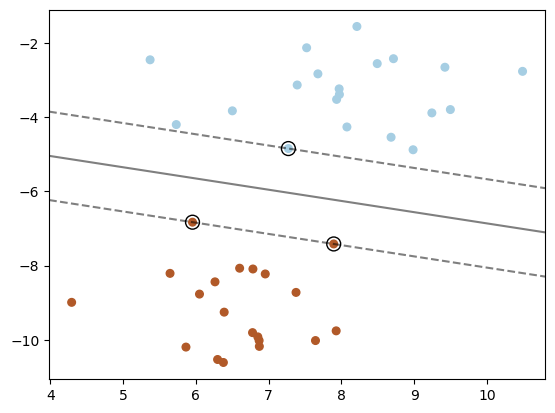

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0],
           clf.support_vectors_[:, 1],
           s = 100,
           linewidth = 1,
           facecolors = 'none',
           edgecolors = 'k')

### 다른 패키지로 구현하기
#### LinearSVC 클래스
- sklearn.svm.linearSVC 클래스 : 선형 커널 SVM 분류 모델
- SVC 클래스에서 하이퍼파라미터 kerne의 값을 'linear'로 선택한 것과 의미 동일
- liblinear 라이브러리로 구현됨 $\rightarrow$ 페널티와 비용 함수의 선택지가 더 다양
- 샘플의 크기가 클 때 SVC 클래스의 선형 커널보다 더 빠르게 학습됨  
- 힌지 손실 함수로부터 직접 도출한 비용 함수의 최적화로 해를 계산
$min_{w, b} \bigg ( \frac{1}{2} w^Tw + C \displaystyle \sum_{i = 1}^{n} max(0, 1 - y_i(w^Tx_i + b)) \bigg )$  

**LinearSCV와 LinearSVR**
- C가 커질수록 C의 값에 덜 민감해짐
- C가 커질수록 학습에 더 큰 시간을 소요하게 됨 (10배까지도 차이가 날 수 있음)
- LinearSVC를 사용할 때 L1 패널티를 적용하는 LinearSVC(penalty = 'l1', dual = False)을 사용하면 일부 피처만 0이 아닌 계수값을 가지는 희소 해(sparse solution)가 얻어짐  
$\rightarrow$ 피처 선택법의 효과  
- 여기서 C를 감소하면 점점 더 적은 피처가 선택됨
- C의 값을 li_min_c로 선택하면 모든 가중치가 0이 되는 모델을 얻음

#### NuSVC 클래스
- sklearn.svm 모듈의 NuSVC 클래스 : SVM 분류 모델 지원
- nu-SCV를 구현한 것
- nu-SCV : C-SVC에서의 C 대신 v(nu) 하이퍼파라미터를 도입하여 다른 방법으로 모델 복잡도를 제어
- SVC와 수학적으로는 동일하나 식의 표현법 차이 등으로 말미암아 하이퍼파라미터가 조금 다름

## 4. 서포트 벡터 머신 모델 보충 수업
### 서포트 벡터 회귀로 확장하기
- 서포트 벡터 회귀(support vector regression, SVR) 모델 : SVM 분류 모델을 확장하여 SVM 회귀 분석을 수행
- SVR, NuSVR, LinearSVR 클래스 제공
    - LinearSVR : 빠르지만 선형 커널만 선택 가능
    - SVR, NuSVR : 본질적으로 비슷한 구조  
<br><br>
$\varepsilon - SVR$ : SVR의 여러 가지 형태의 구현 중 가장 기본적인 형태  
- $1 \leq i \leq n$에 대하여 데이터 샘플의 피처 벡터 $x_i \in \mathbb{R}^p$, 목푯값 $y_i \in \mathbb{R}$과 오차 허용 범위 $\varepsilon > 0$이 주어짐
- $\varepsilon-SVR$ 최적화 문제를 통해 파라미터 도출  
$min_{w, b, \xi, \xi^*} \bigg ( \frac{1}{2} w^Tw + C \displaystyle \sum_{i = 1}^{n} (\xi_i + \xi_i^*)\bigg ) \quad$ subject to $\quad y_i - w^T \phi (x_i) - b \leq \varepsilon + \xi_i, \; w^T\phi(x) + b - y_i \leq \varepsilon + \xi_i^* \quad$ and $\quad \xi_i, \xi_i^* \geq 0,\quad$ for $\quad 1 \leq i \leq n$  
- 비용 함수를 계산할 때 목푯값(target value)에 매우 가까운 샘플에는 규제를 부여하지 않음
    - 예측값이 실제값보다 $\varepsilon$ 크기 이상으로 벗어난 샘플에만 규제를 적용
- 규제 페널티의 정도 ; 벗어난 방향에 따라 $\xi_i$ or $\xi_i^*$로 적용  
<br><br>
- LinearSVR 클래스 : 회귀 모델에서 SVR 클래스에 대응되는 클래스
- 최적화 문제를 통해 파라미터 도출  
$min_{w, b} \bigg ( \frac{1}{2} w^Tw + C \displaystyle \sum_{i = 1}^{n} max(0, |y_i - (w^T\phi(x_i) + b)| - \varepsilon) \bigg )$  
- 오차가 $\varepsilon$보다 작다면 비용을 부과하지 않음  

### 클래스 분류의 확률 판정법
- SVM 모델 : 비확률론적인 분류기(nonprobabilistic classifier) 생성
    - SVM 분류 모델의 결정 함수를 이용하면 각 샘플의 클래스별 점수(score)나 확률을 얻을 수 있음
- 이진 분류의 확률 : Platt 스케일링 기법
- 다중 클래스 분류 : Wu, Lin & Weng 방법
- sklearn.svm 모듈의 SVC 클래스와 NuSVC 클래스에서 probability = True로 설정하면 확률 판정법을 수행

### 되새김 문제
#### 1. SVC 클래스의 적용
- SVC 클래스를 이용해 유방암 데이터셋을 대상으로 한 여러 개의 SVM 분류 모델을 개발하고 그 성능을 비교

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = load_breast_cancer(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- 학습 데이터쌍 (X_train, y_train)에 표준 스케일링(standard scaling)을 적용한 후 세 개의 SVM 분류기를 각각 학습하라.
- 테스트 데이터쌍 (X_test, y_test)에 표준 스케일링 후 SVM 모델을 학습하는 파이프라인을 적용하여 예측값을 산출하고 정확도를 구하라.
1. 선형 커널
2. 다항 커널
3. RBF 커널

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    clf = make_pipeline(StandardScaler(), SVC(kernel = kernel)).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    acc = (y_pred == y_test).mean() * 100
    print(f'커널 : {kernel}, 정확도 : {acc : .2f}%')

커널 : linear, 정확도 :  95.21%
커널 : poly, 정확도 :  84.57%
커널 : rbf, 정확도 :  94.15%
